# Data preparation for Linear Regression and analysis of Categorical variable

In [17]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV

In [18]:
data_for_model = pickle.load(open("C:/Users/vatsal/Desktop/machine learning/model builidng/data/abc_regression_modelling.p", "rb"))

In [19]:
data_for_model

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...,...
862,4,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,372,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,104,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,373,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [20]:
data_for_model.drop("customer_id", axis =1, inplace=True)

In [21]:
data_for_model

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...
862,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [22]:
#shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [23]:
#dealing with missing value
data_for_model.isna().sum

<bound method DataFrame.sum of      distance_from_store  gender  credit_score  customer_loyalty_score  \
455                False   False         False                   False   
621                False   False         False                   False   
64                 False   False         False                   False   
456                False   False         False                   False   
196                False   False         False                   False   
..                   ...     ...           ...                     ...   
146                False   False         False                   False   
226                False   False         False                   False   
588                False   False         False                   False   
771                False   False         False                   False   
219                False   False         False                   False   

     total_sales  total_items  transaction_count  product_area_count  \
455     

In [24]:
data_for_model.dropna(how="any", inplace=True)
data_for_model

C:\Users\vatsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
455,0.28,M,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,F,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,M,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,M,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,F,0.67,0.297,1904.55,376,36,3,52.904167
...,...,...,...,...,...,...,...,...,...
146,1.34,M,0.57,0.690,1682.14,364,47,4,35.790213
226,1.85,M,0.63,0.242,1787.61,196,53,5,33.728491
588,1.53,F,0.54,0.324,1173.84,193,55,5,21.342545
771,2.28,F,0.45,0.079,70.67,23,4,3,17.667500


In [25]:
#dealing with Outliers
outlier_investigation = data_for_model.describe()
outlier_investigation

,distance_from_store,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,2.021041,0.596117,0.509589,1846.502538,278.304569,44.926396,4.312183,36.781487
std,2.566045,0.101352,0.294504,1767.829482,214.236424,21.248012,0.725054,19.337336
min,0.000000,0.260000,0.002000,45.950000,10.000000,4.000000,2.000000,9.342000
25%,0.710000,0.530000,0.263000,942.067500,201.000000,41.000000,4.000000,22.406953
50%,1.645000,0.590000,0.510500,1471.490000,258.500000,50.000000,4.000000,30.365417
75%,2.910000,0.660000,0.771500,2104.727500,318.500000,53.000000,5.000000,47.208474
max,44.370000,0.880000,1.000000,9878.760000,1187.000000,109.000000,5.000000,102.335417


In [26]:
outlier_columns = ["distance_from_store", "total_sales", "total_items"]
#boxplot approach

for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(0.25)
    upper_quartile = data_for_model[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended
    
    outliers = data_for_model[(data_for_model[column] < min_border) | (data_for_model[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")
    
    data_for_model.drop(outliers, inplace=True)

2 outliers detected in column distance_from_store
23 outliers detected in column total_sales
0 outliers detected in column total_items


C:\Users\vatsal\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
#split input variables & output variables

X = data_for_model.drop(["customer_loyalty_score"], axis = 1)
y = data_for_model["customer_loyalty_score"]

In [28]:
X, y

(     distance_from_store gender  credit_score  total_sales  total_items  \
 455                 0.28      M          0.81       990.65          243   
 621                 2.58      F          0.58       333.26           70   
 64                  0.80      M          0.80      1753.96          371   
 456                 0.16      M          0.56       929.57          225   
 196                 3.27      F          0.67      1904.55          376   
 ..                   ...    ...           ...          ...          ...   
 146                 1.34      M          0.57      1682.14          364   
 226                 1.85      M          0.63      1787.61          196   
 588                 1.53      F          0.54      1173.84          193   
 771                 2.28      F          0.45        70.67           23   
 219                 3.91      F          0.58      2802.51          293   
 
      transaction_count  product_area_count  average_basket_value  
 455              

In [29]:
#split out Training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Analysis of Categorical Variable

In [30]:
#deal with categorical variables

categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first")

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis = 1)
X_train.drop(categorical_vars, axis =1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis = 1)
X_test.drop(categorical_vars, axis =1, inplace = True)

C:\Users\vatsal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
X_train

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,0.19,0.57,1096.96,202,53,5,20.697358,1.0
1,0.39,0.43,933.39,220,51,4,18.301765,1.0
2,2.27,0.49,1506.49,281,47,3,32.052979,0.0
3,3.10,0.59,330.79,81,13,4,25.445385,0.0
4,0.07,0.53,2053.04,210,54,5,38.019259,1.0
...,...,...,...,...,...,...,...,...
290,1.02,0.64,2490.66,263,51,5,48.836471,1.0
291,0.66,0.45,3183.80,285,52,5,61.226923,1.0
292,2.60,0.48,1815.22,306,43,4,42.214419,0.0
293,1.81,0.54,1208.05,272,46,4,26.261957,0.0


Here gender is the categorical variable has been converted to binary 1 and 0

# Linear Regression

Optimal number of features: 8


C:\Users\vatsal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


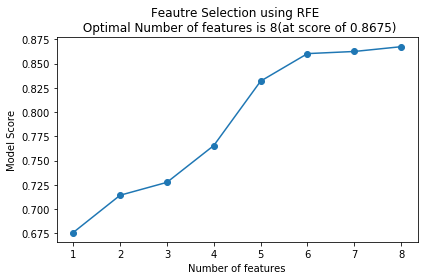

In [24]:
#feature selection

regressor= LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X_train,y_train)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal number of features: {optimal_feature_count}")

X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.grid_scores_)+1), fit.grid_scores_, marker="o")
plt.ylabel("Model Score")
plt.xlabel("Number of features")
plt.title(f"Feautre Selection using RFE \n Optimal Number of features is {optimal_feature_count}(at score of {round(max(fit.grid_scores_), 4)})")
plt.tight_layout()
plt.show()

In [25]:
#Model Training
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
##Model Assessment
#Predict on the Test Set
y_pred = regressor.predict(X_test)

In [34]:
#Calculate R squared
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.7805702910327399


# Cross validation (K-fold)

In [32]:
#Cross validation
cv = KFold(n_splits = 4, shuffle = True, random_state = 42)
cv_scores= cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()



0.8532327536589749

So perhaps our test_train_split wasn't perfectly representative

In [31]:
#Calculated Adjusted R-squared
num_data_points, num_input_vars = X_test.shape
num_data_points, num_input_vars

(74, 8)

In [35]:
adjusted_r_squared = 1 - (1 - r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.7535635576213848


In [36]:
#extract Model Coefficients

coefficients = pd.DataFrame(regressor.coef_)
coefficients

,0
0,-0.201232
1,-0.027697
2,0.000142
3,0.001002
4,-0.004842
5,0.061659
6,-0.003971
7,-0.013393


In [38]:
input_variable_names = pd.DataFrame(X_train.columns)
summary_stats = pd.concat([input_variable_names, coefficients], axis = 1)
summary_stats.columns = ["input_variable", "coefficient"]
summary_stats

,input_variable,coefficient
0,distance_from_store,-0.201232
1,credit_score,-0.027697
2,total_sales,0.000142
3,total_items,0.001002
4,transaction_count,-0.004842
5,product_area_count,0.061659
6,average_basket_value,-0.003971
7,gender_M,-0.013393


In [39]:
# Extract Model Intercept

regressor.intercept_

0.516097417464616